#📌 Extracão

In [74]:
# importações
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
url_csv = 'https://raw.githubusercontent.com/devFari/Challenge_Telecom_X/refs/heads/main/TelecomX_Data.json'

df = pd.read_json(url_csv)

In [76]:
df

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


#🔧 Transformação

In [81]:
# normalizando
for col in df.columns:
    if df[col].apply(lambda x: isinstance(x, dict)).any():
        normalized = pd.json_normalize(df[col])
        df = pd.concat([df.drop(columns=[col]), normalized], axis=1)

In [82]:
df.dtypes

,0
customerID,object
Churn,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object


In [83]:
# Remover duplicatas e valores nulos
df = df.drop_duplicates()
df = df.dropna()

In [84]:
# Adicionar a coluna "Contas_Diarias" = Charges.Monthly / 30
df['Contas_Diarias'] = df['Charges.Monthly'] / 30

In [28]:
#for coluna in df.columns:
#    if df[coluna].dtype == 'object':
#        df[coluna] = df[coluna].str.lower()

#df

In [98]:
# variavel coom a distribuição dos generos
genero = df['gender'].value_counts()

novos_rotulos_genero = {
    'Male': 'Homens',
    'Female': 'Mulheres',
}

genero_renomeado = genero.rename(index=novos_rotulos_genero)

explode_values_genero = [0] * len(genero_renomeado)

if 'Homens' in genero_renomeado.index:
    idx_homens = genero_renomeado.index.get_loc('Homens')
    explode_values_genero[idx_homens] = 0.1

In [101]:
#calculo dos tipo sde contrato
contratos = df['Contract'].value_counts()

novos_rotulos_contratos = {
    'Month-to-month': 'Mensal',    # Renomeia 'Month-to-month' para 'Mensal'
    'One year': 'Anual',          # Renomeia 'One year' para 'Anual'
    'Two year': 'Bienal'          # Renomeia 'Two year' para 'Bienal'
}

contratos_renomeados = contratos.rename(index=novos_rotulos_contratos)

explode_values_contratos = [0] * len(contratos_renomeados)

if 'Mensal' in contratos_renomeados.index:
    idx_mensal = contratos_renomeados.index.get_loc('Mensal')
    explode_values[idx_mensal] = 0.1


In [107]:
#calculo dos tipo sde contrato
clientes = df['Churn'].value_counts()

novos_rotulos_clientes = {
    'Yes': 'Já foi Cliente',
    'No': 'Ainda é Cliente'
}

clientes_renomeados = clientes.rename(index=novos_rotulos_clientes)

explode_values_clientes = [0] * len(clientes_renomeados)

if 'Já foi Cliente' in clientes_renomeados.index:
    idx_ja_foi = clientes_renomeados.index.get_loc('Já foi Cliente')
    explode_values_clientes[idx_ja_foi] = 0.1

#📊 Carga e análise

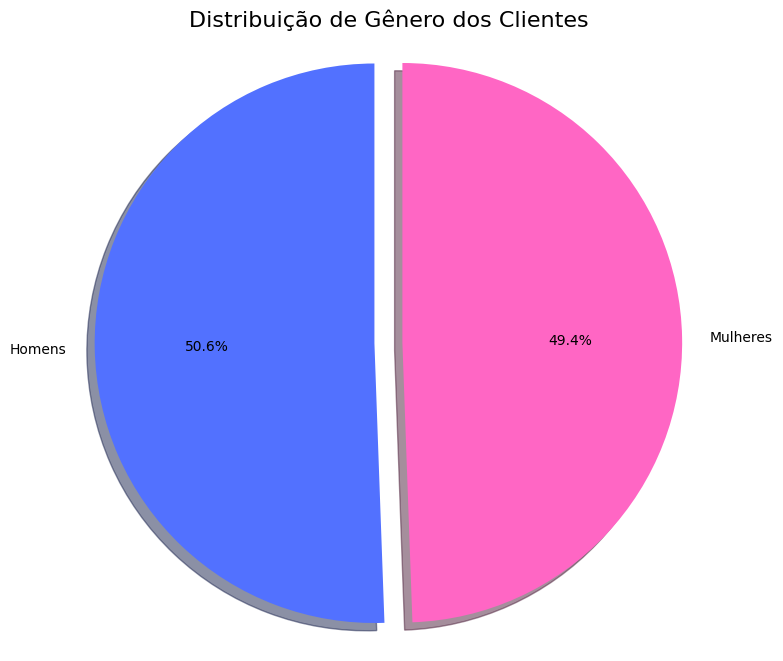

In [111]:
# Plotar o gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(
    genero_renomeado,
    labels=genero_renomeado.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#5271ff', '#ff66c4'],
    explode=explode_values_genero,
    shadow=True
)

plt.title('Distribuição de Gênero dos Clientes', fontsize=16)
plt.axis('equal')

plt.show()

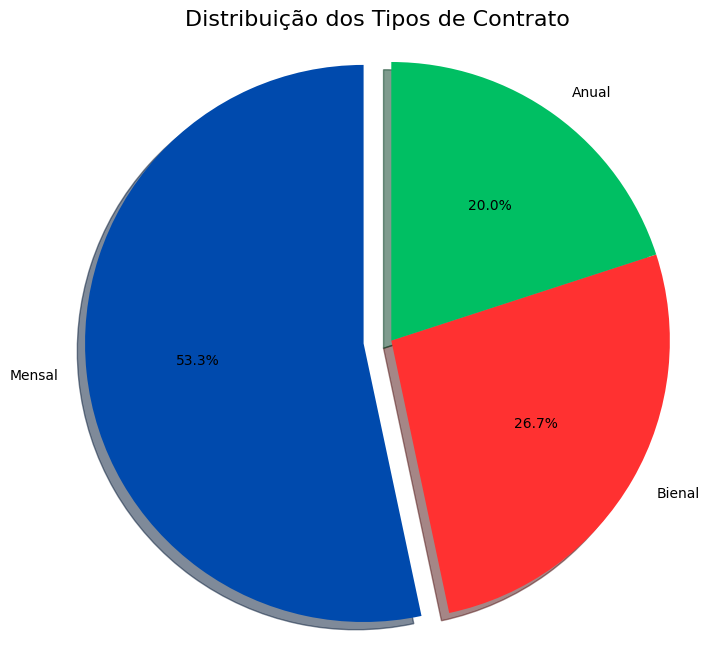

In [100]:
plt.figure(figsize=(8, 8))

plt.pie(
    contratos_renomeados,
    labels=contratos_renomeados.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#004aad', '#ff3131', '#00bf63'],
    explode=explode_values,
    shadow=True
)

plt.title('Distribuição dos Tipos de Contrato', fontsize=16)

plt.axis('equal')

plt.show()

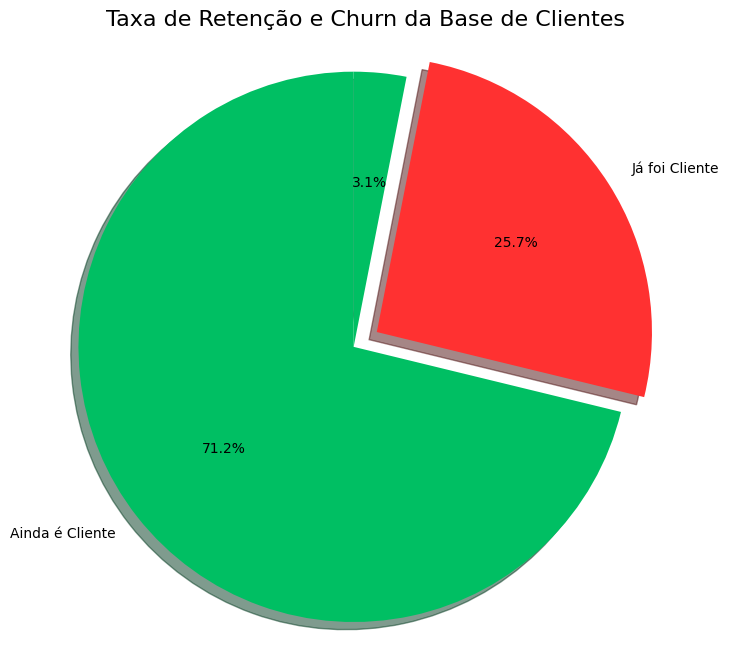

In [112]:
# Plotar o gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(
    clientes_renomeados,
    labels=clientes_renomeados.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#00bf63', '#ff3131'],
    explode=explode_values_clientes,
    shadow=True
)

plt.title('Taxa de Retenção e Churn da Base de Clientes', fontsize=16)
plt.axis('equal')

plt.show()

In [20]:
''' # Criando a figura com 2 subplots (1 linha, 2 colunas)
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Primeiro subplot: Gráfico de Pizza
axs[0].pie(
    contagem_genero,
    labels=contagem_genero.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#0500ff', '#ff00f5'],
    explode=(0.05, 0),  # Destaca a primeira fatia
    shadow=True
)
axs[0].set_title('Distribuição de gênero dos clientes')
axs[0].axis('equal')  # Garante que o gráfico fique circular

# Segundo subplot: Gráfico de Barras (exemplo - personalize conforme sua necessidade)
nomes = ['Month-to-month', 'Two year', 'One year']
cores = ['#1f77b4', '#ff7f0e', '#d62728']

axs[1].bar(nomes, contratos, color=cores)
axs[1].set_title('Produtos mais vendidos')
axs[1].set_ylabel('Quantidade vendida')
axs[1].grid(axis='y', linestyle='--', alpha=0.7)

# Adicionando valores no topo das barras
for i, v in enumerate(contratos):
    axs[1].text(i, v + 3, str(v), ha='center', fontweight='bold')

# Ajustando layout
plt.show() '''

" # Criando a figura com 2 subplots (1 linha, 2 colunas)\nfig, axs = plt.subplots(1, 2, figsize=(14, 6))\n\n# Primeiro subplot: Gráfico de Pizza\naxs[0].pie(\n    contagem_genero,\n    labels=contagem_genero.index,\n    autopct='%1.1f%%',\n    startangle=90,\n    colors=['#0500ff', '#ff00f5'],\n    explode=(0.05, 0),  # Destaca a primeira fatia\n    shadow=True\n)\naxs[0].set_title('Distribuição de gênero dos clientes')\naxs[0].axis('equal')  # Garante que o gráfico fique circular\n\n# Segundo subplot: Gráfico de Barras (exemplo - personalize conforme sua necessidade)\nnomes = ['Month-to-month', 'Two year', 'One year']\ncores = ['#1f77b4', '#ff7f0e', '#d62728']\n\naxs[1].bar(nomes, contratos, color=cores)\naxs[1].set_title('Produtos mais vendidos')\naxs[1].set_ylabel('Quantidade vendida')\naxs[1].grid(axis='y', linestyle='--', alpha=0.7)\n\n# Adicionando valores no topo das barras\nfor i, v in enumerate(contratos):\n    axs[1].text(i, v + 3, str(v), ha='center', fontweight='bold')\n\n#

#📄Relatorio Final